# <span style='color:Hotpink'> Overstap van recepten naar dictonaries </span>

In [2]:
import pandas as pd
recp = pd.read_csv('/data/foodboost/recipes.csv')
tags = pd.read_csv('/data/foodboost/tags.csv')

# Dataset maken met alles lunch en diner recepten

met receptnaam, tag en aantal calorieën
elk recept heeft nog maar 1 tag (lunch, diner, hoofdgerecht)

In [3]:
tagsmaal= ['lunch','diner','hoofdgerecht']
maaltijd_alles = tags[tags['tag'].str.contains('|'.join(tagsmaal))]
maaltijd_alles=maaltijd_alles.drop_duplicates(subset=['recipe'], keep= 'first')
recp = recp[["title","calories"]]
maaltijd_alles=maaltijd_alles.merge(recp, how="inner" ,right_on= "title",left_on="recipe" ) 
maaltijd_alles = maaltijd_alles[["recipe","tag","calories" ]]

# Random data set maken
Later veranderen in de echte

input is een dictonary met receptnamen en ratings

In [4]:
#from random import randrange
import random

#random dataset maken om de code te controleren
rondom_dict={}
random_rij=[]

while len(rondom_dict)<100:
    random_row= random.randrange(len(maaltijd_alles))
    if random_row not in random_rij:
        rondom_dict[maaltijd_alles.iloc[random_row,0]] = random.randint(1, 5)
        random_rij.append(random_row)

Dataframe met de random recepten

In [5]:
random_maaltijden_df = maaltijd_alles[maaltijd_alles.recipe.isin(list(rondom_dict.keys()))]
df= pd.DataFrame(rondom_dict.items(),columns=['recipe','ratings'])
random_maaltijden_df = random_maaltijden_df.merge(df, how="inner" ,right_on= "recipe",left_on="recipe" ) 

In [6]:
rondom_dict

{'Visragout met rijst en groente': 1,
 'Hamlap met honingsaus en chinese kool': 3,
 'Limoenribs met cajunfrites': 4,
 'Tjap tjoy kip': 4,
 'Lasagnette met aubergine-tomatensaus &amp; ricotta': 3,
 'Farrosalade met gedroogde tomaat en basilicumpesto': 4,
 'Champignonsoep gebonden': 2,
 'Groentepannetje met gerookte kip': 1,
 'Venkel-appelsalade': 1,
 'Supersnel rijstpannetje met tuinbonen': 1,
 'In bockbier gestoofde kippenpoten': 2,
 'Plaattaart met pesto': 5,
 'Geroosterde pastinaak met wortel': 4,
 'Lisa goes Vegans frisse tofusalade': 2,
 'Vega-quesadilla ': 2,
 'Lunchsalade met tonijn &amp; parelcouscous': 1,
 'Muesli-notenbrood met komijnekaas en komkommer': 3,
 'Monique van Loons geroosterde eendenborst op Vietnamese salade': 1,
 'Chinese eiermie met snijbonen en kipgehakt': 1,
 "Rachel Khoo's met groenten gevulde bladerdeegbakjes": 4,
 'Spaanse bonenschotel met vis': 4,
 'Mangosalade met garnalentempura ': 3,
 'Snelle hutspot met gebakken kaas': 5,
 'Linzenburger': 3,
 'Aardappe

# Dictonaries maken lunch en diner


In [6]:
random_maaltijden_df_lunch= random_maaltijden_df[random_maaltijden_df["tag"]=="lunch"]
LUNCHES = {row[0]: [row[2], row[3]] for row in random_maaltijden_df_lunch.values}

In [7]:
random_maaltijden_df_diner= random_maaltijden_df[random_maaltijden_df["tag"]!="lunch"]
DINERS = {row[0]: [row[2],row[3]] for row in random_maaltijden_df_diner.values}

# Importeer de benodigde libraries

Importeer pywraplp uit de library ortools.linear_solver 

Importeer matplotlib.pyplot als plt

In [8]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Definieer de benodigde variabelen

Wij willen voor het gemak 2 keer dezelfde  dictionairy hebben onder een verschillende naam.
Deze dictionairies noemen wij MAALTIJDEN en MAALTIJDEN2.

Ook maken wij een lijst (UNITS) aan met alleen de 'keys' (namen van de gerechten) van de MAALTIJDEN dictionairy en
een lijst (DATA) met de value's (het aantal calorieën van elke maaltijd).

Vervolgens maken wij 2 lijsten aan met alle dagen van de week (DAGEN) en een lijst met de afgekorte versie
van de dagen (DAGPLT) die wij later gaan gebruiken in onze plot.

Als laatste maken wij een dictionairy (AANBEVELING) aan waar de aanbevelingen in komen te staan voor de week 
en een lijst met recourses waar we een paar essentiële waarden in zetten voor de restricties (1040 is het maximaal aantal calorieën per dag en bijde 1en worden gebruikt om het maximaal aantal diners en lunches limiteren tot 1 per dag).

In [9]:
#Definieer de benodigde variabelen
LUNCHES2 = LUNCHES.copy()

DINERS2 = DINERS.copy()

MAALTIJDEN = LUNCHES | DINERS

MAALTIJDEN2 = MAALTIJDEN.copy()

UNITS = list(LUNCHES.keys()) + list(DINERS.keys()) #+ list(LUNCHES_RATING.keys()) + list(DINERS_RATING.keys())

DATA = list(LUNCHES.values()) +  list(DINERS.values())#, + list(LUNCHES_RATING.values()) +list(DINERS_RATING.values())

DAGEN = ['Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag']

DAGPLT = ['Ma', 'Di', 'Wo', 'Do', 'Vr', 'Za', 'Zo']

Kcal = []
Kcal_lunch = []
Kcal_diner = [] 
rating = []
rating_lunch = []
rating_diner = []

AANBEVELING = {}

RESOURCES = [1040, 1, 1, 1, 1]

# Maak het LP model aan

Eerst maken wij een leeg LP model aan en noemen deze solver. Hierin geven wij de naam van ons LP model mee. 
Het tweede onderdeel moet gewoon gekopieerd en geplakt worden.

In stap 1 geven wij aan met welk type variabelen wij in de solver gaan werken. Deze hebben wij op integer 
(Intvar) gezet omdat wij alleen met hele recepten (kunnen) werken. 

In stap 2 worden de restricties toegevoegd aan het model door middel van for loops. De eerste for loop zorgt
ervoor dat alle gekozen recepten niet de maximale caloriegrens van 1040 word overschreden. De tweede for loop
zegt dat er maximaal maar 1 lunchrecept gekozen mag worden en de derde for loop geeft aan dat er maar 1 diner 
gekozen mag worden.

In stap 3 van de solver geven we aan wat onze doelfunctie is en wat ons doel is met de doelfunctie. Ons doel 
is in dit geval om het aandat caloriën zo dicht mogelijk bij de grenswaarde te krijgen van 1040 calorieën, dus 
kiezen wij om de doelfunctie te maximaliseren (Solver.Maximize()).

Vervolgens laten wij het programma zoeken naar de maximale doelfunctie en slaan wij alle gekozen recepten op
in een lijst genaamd keuzelijst. Als de solver geen oplossing kan vinden geeft deze een melding hiervoor en word er niks opgeslagen.

In [10]:
def solve_army(UNITS, DATA, RESOURCES, dag):
  # Create the linear solver using the CBC backend
  solver = pywraplp.Solver('Minimize resource consumption', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

  # 1. Create the variables we want to optimize
  units = [solver.IntVar(0, 1, unit) for unit in UNITS]

  # 2. Add constraints for each resource
  for r in enumerate(RESOURCES):
    solver.Add(sum(DATA[u][0] * units[u] for u, _ in enumerate(units)) <= RESOURCES[0])       #max 1040 kcal
    # solver.Add(sum(DATA[u][0] * units[u] for u, _ in enumerate(units)) >= RESOURCES[3])
    
  for i in range(len(LUNCHES)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES))) <= RESOURCES[1])                    #max 1 lunch
    
  for i in range(len(DINERS)):
    solver.Add(sum(units[u] for u in range(len(LUNCHES), len(MAALTIJDEN))) <= RESOURCES[2])   #max 1 diner
  
#----------------------------------------------------------------------------------------------------
#hoe veel gaan we de rating laten mee tellen?

  # 3. Minimize the objective function
  solver.Maximize(sum((DATA[u][0]+DATA[u][1] * 10 )* units[u] for u, _ in enumerate(units)))

#----------------------------------------------------------------------------------------------------
    
  # Solve problem
  status = solver.Solve()

  # If an optimal solution has been found, print results
  if status == pywraplp.Solver.OPTIMAL:
    for u, _ in enumerate(units):
      if units[u].solution_value() == 1:
          KEUZELIJST.append(units[u].name())
          AANBEVELING[dag] = KEUZELIJST
          MAALTIJDEN.pop(units[u].name())
          # print(KEUZELIJST)
  else:
      print('The solver could not find an optimal solution.')

# Zorg ervoor dat voor alle dagen worden ingedeeld

Zorg ervoor dat de solver 7 keer word aangeroepen om voor elke dag een aanbeveling te kunnen geven.

In [11]:
for i in range(7):
    KEUZELIJST = []
    solve_army(UNITS, DATA, RESOURCES, DAGEN[i])
    UNITS = list(MAALTIJDEN.keys())
    DATA = list(MAALTIJDEN.values())


# Uitprinten van de aanbevelingen

Print voor elke dag de aanbeveling uit voor de lunch, het diner en het totaal aantal 
calorieën van de lunch en het diner.

In [12]:
print()
print("AANBEVELINGEN VOOR DE WEEK:")
print()
for i in range(len(DAGEN)):
    Kcal.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]])
    rating.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]][1] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]][1])
    
    Kcal_lunch.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]][0])
    Kcal_diner.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]][0])
    rating_lunch.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]][1])
    rating_diner.append(MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]][1])
    
    
    
    print(f"{DAGEN[i]},    LUNCH: {AANBEVELING[DAGEN[i]][0]}")
    print(f"            DINER: {AANBEVELING[DAGEN[i]][1]}")
    print(f"            Kcal:   {MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]][0] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]][0]}")
    print(f"            rating:   {MAALTIJDEN2[AANBEVELING[DAGEN[i]][0]][1] + MAALTIJDEN2[AANBEVELING[DAGEN[i]][1]][1]}")
    


AANBEVELINGEN VOOR DE WEEK:

Maandag,    LUNCH: Volkorenbolletje met zuivelspread, komkommer en gerookte zalm
            DINER: Indiase kipspies met spicy pilavrijst
            Kcal:   1035
            rating:   10
Dinsdag,    LUNCH: Venkelsoep met gerookte zalm
            DINER: Hoisin chicken wings met noedels
            Kcal:   1040
            rating:   9
Woensdag,    LUNCH: &amp;Suus’ buik-weg-salade
            DINER: Kaasschnitzel met knoflookkrieltjes en salade van witlof &amp; mandarijn
            Kcal:   1040
            rating:   8
Donderdag,    LUNCH: Pastasalade met pesto en garnalen
            DINER: Volkorencouscous met geroosterde venkel en mangoyoghurt
            Kcal:   1040
            rating:   9
Vrijdag,    LUNCH: Broodje kaas
            DINER: Picadillo-tostada's met guacamole
            Kcal:   1035
            rating:   8
Zaterdag,    LUNCH: Zuurkoolstamppot met appel, kaneel en bruine suiker
            DINER: Geroosterde aubergines met sinaasappeldre

# Maak een plot van het totaal aantal ingedeelde calorieën

Eerst worden font1 en font2 toegekent. Hierin staat de betreffende font die we willen gebruiken ('family'), de kleur van de tekst ('color'), de dikte van de text ('weight') en de groote van het lettertype ('size'). font1 wordt hier gebruikt voor de titel en font2 wordt gebruikt voor de namen van de assen.

Als tweede wort er een barplot gemaakt en hiervan worden de kleur bepaald, en de naam van de assen en de titel.

Als laatste word de plot laten zien van het programma.

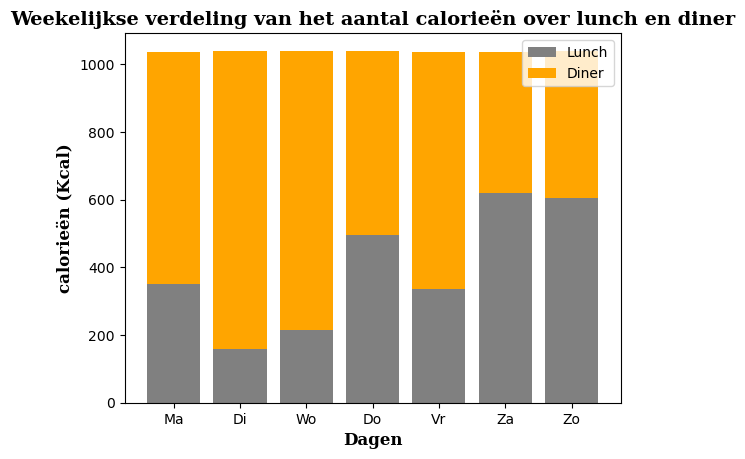

In [28]:
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

plt.bar(DAGPLT, Kcal_lunch, color='grey', linewidth = 1.5)
plt.bar(DAGPLT, Kcal_diner, bottom=Kcal_lunch, color='orange')
plt.xlabel('Dagen', fontdict = font2)
plt.ylabel('calorieën (Kcal)', fontdict = font2)
plt.title("Weekelijkse verdeling van het aantal calorieën over lunch en diner", fontdict = font1)
plt.legend(["Lunch", "Diner"])
plt.show()
#Figuur.savefig('Kcal_verloop_per_week_V2.jpeg', dpi = 100)

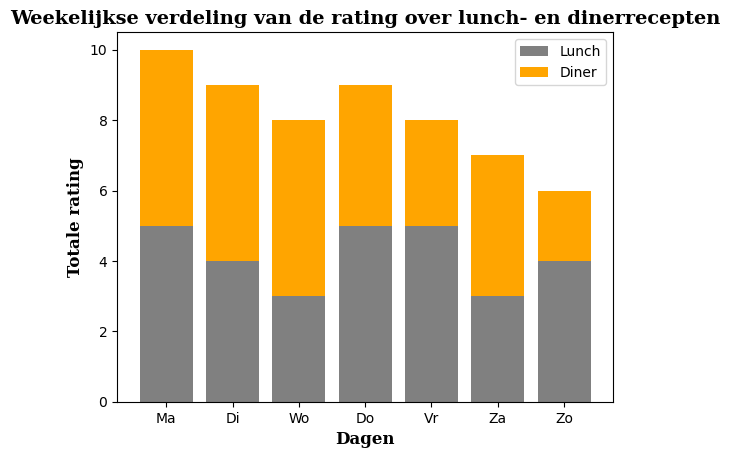

In [25]:
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

plt.bar(DAGPLT, rating_lunch, color = 'grey', linewidth = 1.5)
plt.bar(DAGPLT, rating_diner, bottom = rating_lunch, color = 'orange')
plt.xlabel('Dagen', fontdict = font2)
plt.ylabel('Totale rating', fontdict = font2)
plt.title("Weekelijkse verdeling van de rating over lunch- en dinerrecepten", fontdict = font1)
plt.legend(["Lunch", "Diner"])
plt.show()
#Figuur.savefig('rating_verloop_per_week_V2.jpeg', dpi = 100)